In [2]:
import numpy as np
import timeit
#from derivativeClass import DerivativeNum4
import matplotlib.pyplot as plt
plt.rc('font', size=20)

In [17]:
LEFT_BOUNDARY = 0.
RIGHT_BOUNDARY = 1.

# RHS params
KAPPA = 0.1

# Mesh params
h_ = 0.04
#########NUM_BLOCKS = int(1 / h)

dt_ = h_**2 / (200 * KAPPA)
T_START = 0.

T = 0.04  # selected point to display solution

# Differentiation param
#STEP = 10e-3

#EPS = 10e-3

In [18]:
class LogisticRightHandSide:
        
    def __init__(self, kappa):
        self._kappa = float(kappa)

    
    def __call__(self, u):
        dim = int(1 / h) + 1

        tridiagMatrix = np.zeros((dim, dim))
        flat = tridiagMatrix.ravel()
        flat[0::dim + 1] = -2
        flat[dim::dim + 1] = 1
        flat[1::dim + 1] = 1

        F = [bLeft] + [0] * (dim - 2) + [bRight]

        return (self._kappa / h**2) * (tridiagMatrix.dot(u) + F)

In [19]:
class NumMethod:
    
    def __init__(self, f, h, dt):
        
        self.f = f
       
        self.h = h
        self.numBlocks, self.numPoints = int(1 / h), int(1 / h) + 1
        
        self.x = [i * h for i in range(self.numPoints)]
        #self.x = np.linspace(LEFT_BOUNDARY, RIGHT_BOUNDARY, self.numPoints)
        self.u0x = [self.getInitValue(i) for i in self.x]
        
        self.dt = dt
        self.timeBlocks, self.timePoints = int(T / dt), int(T / dt) + 1
        self.timeArray = np.linspace(T_START, T, self.timePoints)

        self.solutionArray = np.zeros((self.timePoints, self.numPoints))
               
        print('Объект класса ' + self.__class__.__name__ + ' создан.')


    def getTimeArray(self):
        return self.timeArray
    
    def getSolutionArray(self, i):
        return self.solutionArray[i]
    
    def getX(self):
        return self.x

    def getInitValue(self, x):
        return 1. if ((x >= 0.4) and (x <= 0.6)) else 0.
    
    def solve(self):

        print('Начало расчета методом %s ...' % self.__class__.__name__)
        start = timeit.default_timer()
        
        self.solutionArray[0] = self.u0x
        
        for i in range(self.timeBlocks):
            
            # for short
            uOld, dt, f = self.solutionArray[i], self.dt, self.f
                                
            self.solutionArray[i + 1] = self._advanceNextStep(i)
            
            # Progress check
            #if ((i + 1) % (self.timeBlocks // 100) == 0):
            #    t = self.timeArray[i + 1]
            #    print('%.2f%% вычислений завершено' % (100. * float(t) / (T - T_START)))
                               
        elapsedTime = float(timeit.default_timer() - start)
        print('Время расчета: %.2e сек.' % elapsedTime)

    
    def _advanceNextStep(self, i):
        pass
    

    def plotSolution(self):
        plt.figure(figsize=(11,7))
        plt.plot(self.x, self.solutionArray[len(self.timeArray) - 1], '-o')
        plt.grid('off')
        plt.title('Решение методом %s ' % self.__class__.__name__)
        plt.xlabel('Время')
        plt.ylabel('Популяция')
        plt.show()

In [20]:
class ExplicitEuler(NumMethod):    

    def _advanceNextStep(self, i):
        uOld, dt, f = self.solutionArray[i], self.dt, self.f  

        uNew = uOld + dt * f(uOld)      
        return uNew

In [21]:
class Heun(NumMethod):

    def _advanceNextStep(self, i):       
        uOld, dt, f = self.solutionArray[i], self.dt, self.f
        
        uStar = uOld + dt * f(uOld) 
        
        uNew = uOld + dt / 2. * (f(uOld) + f(uStar))        
        return uNew

In [22]:
class RK4(NumMethod):

    def _advanceNextStep(self, i):        
        uOld, dt, f = self.solutionArray[i], self.dt, self.f

        k1 = f(uOld)
        k2 = f(uOld + dt / 2. * k1)
        k3 = f(uOld + dt / 2. * k2)
        k4 = f(uOld + dt * k3)
        
        return uOld + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)  

In [23]:
rhs1 = LogisticRightHandSide(kappa=KAPPA)

# Boundary conditions
bLeft = 0.
bRight = 0.

Объект класса ExplicitEuler создан.
Начало расчета методом ExplicitEuler ...
Время расчета: 1.65e-02 сек.


<Figure size 792x504 with 0 Axes>

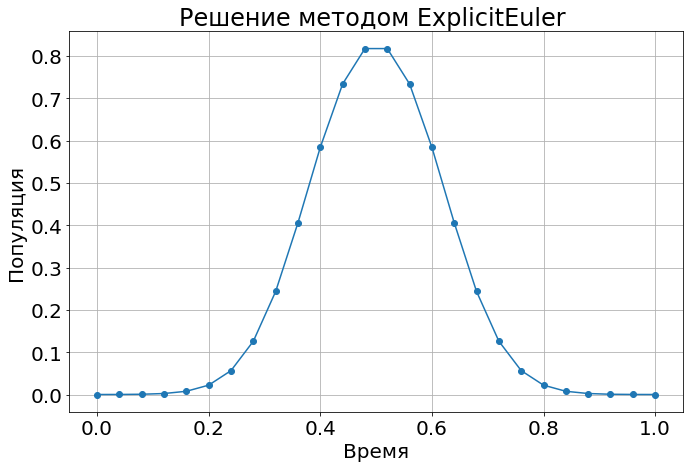

Объект класса Heun создан.
Начало расчета методом Heun ...
Время расчета: 3.39e-02 сек.


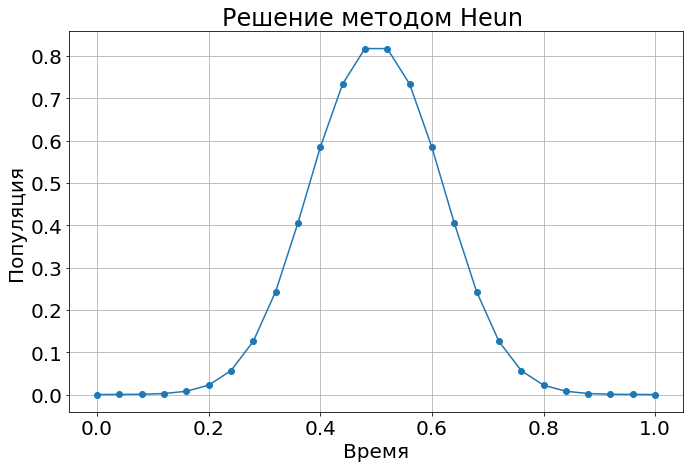

Объект класса RK4 создан.
Начало расчета методом RK4 ...
Время расчета: 4.23e-02 сек.


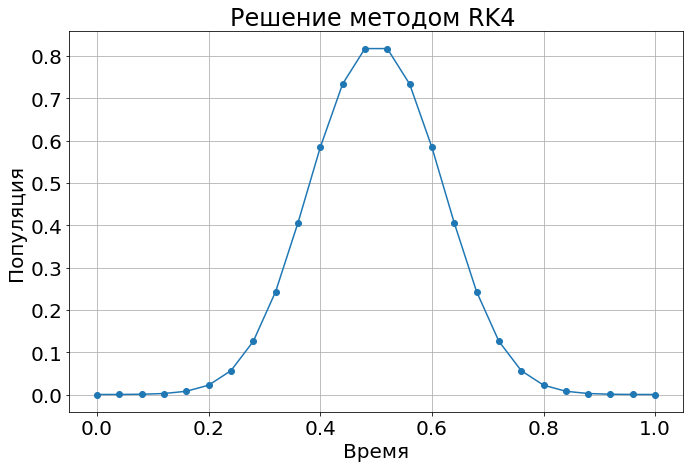

In [26]:
# Method usage example
methodsClass = [ExplicitEuler, Heun, RK4]
#method = ExplicitEuler(f=rhs1, h=h, dt=dt)
#method.solve()
#method.plotSolution()
plt.figure(figsize=(11,7))
for methodClass in methodsClass:
    method = methodClass(f=rhs1, h=h_, dt=dt_)    
    method.solve()
    method.plotSolution()

Объект класса ExplicitEuler создан.
Начало расчета методом ExplicitEuler ...
Время расчета: 1.82e-02 сек.
Объект класса Heun создан.
Начало расчета методом Heun ...
Время расчета: 2.76e-02 сек.
Объект класса RK4 создан.
Начало расчета методом RK4 ...
Время расчета: 3.43e-02 сек.


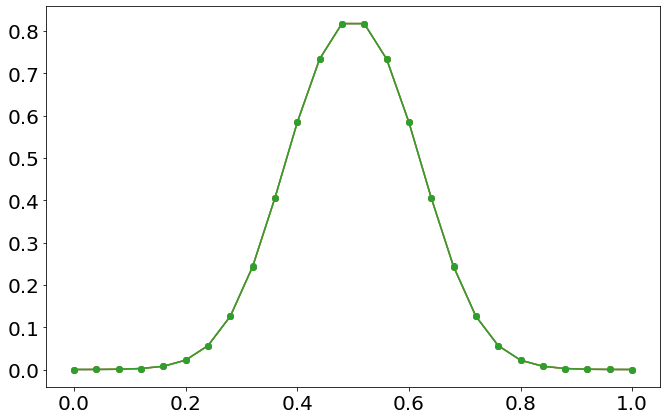

In [25]:
# Every method on one plot
plt.figure(figsize=(11,7))

for methodClass in methodsClass:
    method = methodClass(f=rhs1, h=h_, dt=dt_) 
    method.solve()
#print(method.getSolutionArray(len(method.getTimeArray()) - 1), len(method.getTimeArray()))
    plt.plot(method.getX(), method.getSolutionArray(len(method.getTimeArray()) - 1), '-o')
plt.show()